# Algoritmo Ford-Fulkerson

O algoritmo de Ford-Fulkerson, encontra o fluxo máximo em um grafo direcionado valorado. 

### Exemplo:
Dado um grafo  $G=(V,E)$, para encontrar o fluxo máximo precisamos ter um vértice inicial *s* **(source)** e um vértice terminal *t* **(sink)**.

![Exemplo CLRS Ford Fulkerson](./Imagens/ford-fulkerson.png)


1. Inicie o fluxo com o valor 0.

2. Encontre um caminho aumentante. 
    1. Caminho aumentante: 0-1-3-5.

<img src="./Imagens/caminho-aumentante.png" style="width:50%; margin-left:auto; margin-right:auto">

3. Encontre a capacide de fluxo(cf) do caminho definido, a capacidade de fluxo é correspondente à aresta de menor peso do caminho.
    1. cf = min{cf(u,v): (u, v) em p}
    2. A menor capacide de fluxo no caminho *p* é igual a 12.

<table>
    <tr>
        <td style="text-align:center;">Grafo residual</td>
        <td style="text-align:center;">Grafo com o fluxo máximo do caminho aumentante definido.</td>
    </tr>
    <tr>
        <td><img src="./Imagens/ford-fulkerson1.png"></td>
        <td><img src="./Imagens/ford-fulkerson2.png"></td>
    </tr>    
</table>

4. Enquando existir caminho aumentante no grafo, continue a execução do loop a partir de passo 3.

### Pseudocódigo

<pre>
FORD-FULKERSON-METHOD(G, s)
1 inicialize o valor do fluxo f com 0
2 enquando existir um caminho aumentante p no grafo residual Gf
3    aumente o fluxo f através de p
4 retorne f


Ford-Fulkerson(G,s,t)
1 for each edge (u,v) in G.E
2   (u,v).f = 0
3 enquando existir um caminho aumentante p no grafo residual Gf 
4   cf = min{cf(u,v): (u, v) is in p}
5   for each edge (u,v) em p 
6       if (u, v).f = (u, v).f + cf(p)
7           (v, u).f = (v, u).f - cf(p)

p - path(caminho)
cf - capacidade de fluxo
Gf - grafo residual
f - flow(fluxo)
</pre>


# Código 

{0: {1: 16, 2: 13}, 1: {3: 12}, 2: {1: 4, 4: 14}, 3: {2: 9, 5: 20}, 4: {3: 7, 5: 4}, 5: {}}
visitado [0, 1, 2, 3, 4, 5]
predecessor {0: 0, 1: 0, 2: 0, 3: 1, 4: 2, 5: 3}
caminho [0, 1, 3, 5]
[16]
[16, 12]
[16, 12, 20]
cf 12
grafo residual {0: {1: 4, 2: 13}, 1: {3: 0}, 2: {1: 4, 4: 14}, 3: {2: 9, 5: 8}, 4: {3: 7, 5: 4}, 5: {}}
visitado [0, 1, 2, 4, 3, 5]
predecessor {0: 0, 1: 0, 2: 0, 4: 2, 3: 4, 5: 4}
caminho [0, 2, 4, 5]
[13]
[13, 14]
[13, 14, 4]
cf 4
grafo residual {0: {1: 4, 2: 9}, 1: {3: 0}, 2: {1: 4, 4: 10}, 3: {2: 9, 5: 8}, 4: {3: 7, 5: 0}, 5: {}}
visitado [0, 1, 2, 4, 3, 5]
predecessor {0: 0, 1: 0, 2: 0, 4: 2, 3: 4, 5: 3}
caminho [0, 2, 4, 3, 5]
[9]
[9, 10]
[9, 10, 7]
[9, 10, 7, 8]
cf 7
grafo residual {0: {1: 4, 2: 2}, 1: {3: 0}, 2: {1: 4, 4: 3}, 3: {2: 9, 5: 1}, 4: {3: 0, 5: 0}, 5: {}}
visitado [0, 1, 2, 4]
predecessor {0: 0, 1: 0, 2: 0, 4: 2}
caminho []
flow 23
visitado [0, 1, 2, 4]
predecessor {0: 0, 1: 0, 2: 0, 4: 2}
caminho []
flow 0


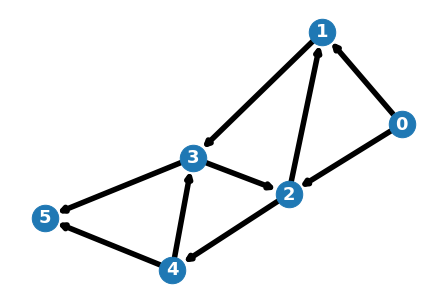

In [2]:
'''
FORD-FULKERSON-METHOD.G; s; t/
1 initialize flow f to 0
2 while there exists an augmenting path p in the residual network Gf
3    augment flow f along p
4 return f

Ford-Fulkerson(G,s,t)
1 for each edge (u,v) in G.E
2   (u,v).f = 0
3 while there exists a path p from s to t in residualnetwork Gf 
4   cf = min{cf(u,v): (u, v) is in p}
5   for each edge (u,v) in p 
6       if (u, v).f = (u, v).f + cf(p)
7           (v, u).f = (v, u).f - cf(p)
8 


'''
import copy


grafo = { 0: {1: 16, 2: 13},
          1: {3: 12},
          2: {1: 4, 4: 14},
          3: {2: 9, 5: 20},
          4: {3: 7, 5: 4},
          5: {}}

source = 0
sink = 5
grafo_residual = {}
caminho = []

grafo_residual = copy.deepcopy(grafo)
print(grafo_residual)

def ford_fulkerson(G, s, t):
    flow = 0

    while caminho_aumentante():
        if caminho:
            menor = []
            for i in range(len(caminho)-1):
                menor.append(grafo_residual[caminho[i]][caminho[i+1]])
                print(menor)
            cf = min(menor)
            print('cf', cf)
            flow += cf
            for i in range(len(caminho)-1):
                grafo_residual[caminho[i]][caminho[i+1]] -= cf
        print("grafo residual", grafo_residual)
    print("flow", flow)

def caminho_aumentante():
    visitado = [source]    
    predecessor = {source: 0}
    caminho.clear()

    
    list(grafo.keys())
 
    Q = []
    Q.append(source)
    s = sink
    while Q:
        u = Q.pop(0)
        for v in grafo_residual[u]:
            if (v not in visitado) and (grafo_residual[u][v] > 0):
                visitado.append(v)
                predecessor[v] = u
                Q.append(v)
    
    print("visitado", visitado)
    print("predecessor", predecessor)
    if sink in predecessor:         
        for x in range(len(predecessor)):
            if s not in caminho:
                caminho.insert(0, s)
                s = predecessor[s]
               
    
    
    print("caminho", caminho)
    if sink in caminho:
        return True
    else:
        return False    


ford_fulkerson(grafo, source, sink)




ford_fulkerson(grafo, source, sink)
# Desenhando o grafo com networkx e matplotlib
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph(grafo)

plt.figure()
nx.draw(G, with_labels=True, font_weight='bold', node_size=700, font_size=18, width=5.5, font_color='w')
plt.show()




### Fonte:
Cormen, Thomas H.; Leiserson, Charles E.; Rivest, Ronald L.; Stein, Clifford (2009) [1990]. _Introduction to Algorithms_ (3rd ed.). 